# Check the Python version being used

In [1]:
!python --version

Python 3.7.6


# Check that the available gpu is being utilized

In [2]:
import tensorflow as tf

In [3]:
print("Num GPUs Available")
print(len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available
1


# Read in clustering dataset, note that this one is still missing the aggregated weather data, but this can easily be added in later

In [4]:
from pandas import read_csv

df = read_csv('Time_Series_For_Clustering_El_Paso_Final.csv')

In [5]:
df

,Bridge_ID,time_0,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,...,time_12,time_13,time_14,time_15,time_16,time_17,time_18,time_19,time_20,time_21
0,2.12E+13,"[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]",...,"[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]"
1,CALHAN-8TH ST.,"[36.0, 97.0, 428, 1949, 2, 10.9, 7.3]","[36.0, 96.9, 955, 1949, 2, 10.9, 7.3]","[36.0, 96.9, 955, 1949, 2, 10.9, 7.3]","[36.0, 96.9, 955, 1949, 2, 10.9, 7.3]","[36.0, 96.9, 955, 1949, 2, 10.9, 7.3]","[36.3, 97.0, 955, 1949, 2, 11.0, 7.0]","[36.3, 96.9, 955, 1949, 2, 11.0, 7.3]","[36.3, 96.9, 983, 1949, 2, 11.0, 7.3]","[36.3, 96.9, 983, 1949, 2, 11.0, 7.3]",...,"[36.3, 97.0, 422, 1949, 2, 11.0, 7.3]","[36.3, 97.0, 422, 1949, 2, 11.0, 7.3]","[36.3, 97.0, 422, 1949, 2, 11.0, 7.3]","[36.3, 97.0, 422, 1949, 2, 9.7, 7.3]","[36.3, 97.0, 369, 1949, 2, 9.7, 7.3]","[36.3, 86.0, 369, 1949, 2, 9.7, 7.3]","[36.3, 86.0, 369, 1949, 2, 9.7, 7.3]","[36.3, 86.0, 369, 1949, 2, 9.7, 7.3]","[36.3, 86.0, 369, 1949, 2, 9.7, 7.3]","[36.3, 86.0, 522, 1949, 2, 9.7, 7.3]"
2,CSG-C.80-07.65,"[36.0, 83.9, 417, 1970, 2, 6.6, 6.4]","[36.0, 70.9, 351, 1970, 2, 6.6, 3.0]","[36.0, 70.9, 351, 1970, 2, 6.6, 3.0]","[36.0, 70.9, 351, 1970, 2, 6.6, 3.0]","[36.0, 70.9, 351, 1970, 2, 6.6, 3.0]","[36.3, 76.0, 351, 1970, 2, 6.6, 3.0]","[36.3, 69.0, 351, 1970, 2, 6.6, 3.0]","[36.3, 66.9, 478, 1970, 2, 6.6, 2.9]","[36.3, 66.9, 478, 1970, 2, 6.6, 2.9]",...,"[36.3, 62.9, 478, 1970, 2, 6.6, 2.9]","[36.3, 62.9, 777, 1970, 2, 6.6, 2.9]","[36.3, 62.9, 777, 1970, 2, 6.6, 2.9]","[36.3, 62.9, 777, 1970, 2, 6.6, 2.9]","[36.3, 62.9, 623, 1970, 2, 6.6, 2.9]","[36.3, 62.9, 623, 1970, 2, 6.6, 2.9]","[36.3, 62.9, 623, 1970, 2, 6.6, 2.9]","[32.7, 55.7, 623, 1970, 2, 6.6, 2.9]","[32.7, 55.7, 623, 1970, 2, 6.6, 2.9]","[32.7, 55.7, 717, 1970, 2, 6.6, 2.9]"
3,CSG-D.04-10.42,"[36.0, 82.0, 1836, 1955, 2, 7.6, 4.0]","[36.0, 84.3, 1459, 1955, 2, 7.7, 4.0]","[36.0, 84.3, 1459, 1955, 2, 7.7, 4.0]","[36.0, 84.3, 1459, 1955, 2, 7.7, 4.0]","[36.0, 84.3, 1459, 1955, 2, 7.7, 3.4]","[36.3, 83.4, 1459, 1955, 2, 7.7, 3.0]","[36.3, 84.3, 1459, 1955, 2, 7.7, 3.4]","[36.3, 84.4, 1295, 1955, 2, 7.7, 3.4]","[36.3, 84.4, 1295, 1955, 2, 7.7, 3.4]",...,"[36.3, 72.3, 1295, 1955, 2, 7.7, 3.4]","[36.3, 72.3, 1329, 1955, 2, 7.7, 3.4]","[36.3, 72.3, 1329, 1955, 2, 7.7, 3.4]","[36.3, 72.3, 1329, 1955, 2, 7.7, 3.4]","[36.3, 72.3, 1446, 1955, 2, 7.7, 3.4]","[36.3, 72.3, 1446, 1955, 2, 7.7, 3.4]","[36.3, 72.3, 1446, 1955, 2, 7.7, 3.4]","[27.2, 50.2, 1446, 1955, 2, 7.7, 3.4]","[27.2, 50.2, 1446, 1955, 2, 7.7, 3.4]","[27.2, 50.2, 2696, 1955, 2, 7.7, 3.4]"
4,CSG-D.37-15.67,"[36.0, 97.0, 87, 1984, 2, 12.8, 3.0]","[36.0, 97.0, 305, 1984, 2, 12.8, 3.0]","[36.0, 97.0, 305, 1984, 2, 12.8, 3.0]","[36.0, 97.0, 305, 1984, 2, 12.8, 3.0]","[36.0, 97.0, 305, 1984, 2, 12.8, 3.0]","[36.3, 97.0, 305, 1984, 2, 12.8, 3.0]","[36.3, 97.0, 305, 1984, 2, 12.8, 3.0]","[36.3, 97.0, 397, 1984, 2, 12.8, 3.0]","[36.3, 97.0, 397, 1984, 2, 12.8, 3.0]",...,"[36.3, 98.0, 397, 1984, 2, 13.3, 3.0]","[36.3, 98.0, 287, 1984, 2, 13.3, 3.0]","[36.3, 98.0, 287, 1984, 2, 13.3, 3.0]","[36.3, 99.0, 287, 1984, 2, 12.8, 3.0]","[36.3, 99.0, 302, 1984, 2, 12.8, 3.0]","[36.3, 100.0, 302, 1984, 2, 12.8, 3.0]","[36.3, 100.0, 302, 1984, 2, 12.8, 3.0]","[36.3, 100.0, 302, 1984, 2, 12.8, 3.0]","[36.3, 100.0, 302, 1984, 2, 12.8, 3.0]","[36.3, 100.0, 268, 1984, 2, 12.8, 3.0]"
...

# For the first row of the dataset, plot the sufficiency rating over time

In [6]:
first_row = df.iloc[1]

In [7]:
first_row = first_row.iloc[1:]

In [8]:
first_row

time_0     [36.0, 97.0, 428, 1949, 2, 10.9, 7.3]
time_1     [36.0, 96.9, 955, 1949, 2, 10.9, 7.3]
time_2     [36.0, 96.9, 955, 1949, 2, 10.9, 7.3]
time_3     [36.0, 96.9, 955, 1949, 2, 10.9, 7.3]
time_4     [36.0, 96.9, 955, 1949, 2, 10.9, 7.3]
time_5     [36.3, 97.0, 955, 1949, 2, 11.0, 7.0]
time_6     [36.3, 96.9, 955, 1949, 2, 11.0, 7.3]
time_7     [36.3, 96.9, 983, 1949, 2, 11.0, 7.3]
time_8     [36.3, 96.9, 983, 1949, 2, 11.0, 7.3]
time_9     [36.3, 96.9, 983, 1949, 2, 11.0, 7.3]
time_10    [36.3, 96.9, 983, 1949, 2, 11.0, 7.3]
time_11    [36.3, 97.0, 422, 1949, 2, 11.0, 7.3]
time_12    [36.3, 97.0, 422, 1949, 2, 11.0, 7.3]
time_13    [36.3, 97.0, 422, 1949, 2, 11.0, 7.3]
time_14    [36.3, 97.0, 422, 1949, 2, 11.0, 7.3]
time_15     [36.3, 97.0, 422, 1949, 2, 9.7, 7.3]
time_16     [36.3, 97.0, 369, 1949, 2, 9.7, 7.3]
time_17     [36.3, 86.0, 369, 1949, 2, 9.7, 7.3]
time_18     [36.3, 86.0, 369, 1949, 2, 9.7, 7.3]
time_19     [36.3, 86.0, 369, 1949, 2, 9.7, 7.3]
time_20     [36.3, 8

In [9]:
import re

non_decimal = re.compile(r'[^\d.]+')

list_of_row_components = []

for i, row in first_row.iteritems():
    current_row_components = row.split(', ')
    current_row_components_replaced = []
    
#     print(current_row_components)
    for idx, component in enumerate(current_row_components):
    #     print(first_row_components[idx])
        result = non_decimal.sub('', current_row_components[idx])
        current_row_components_replaced.append(float(result))
        
#     print(current_row_components_replaced)
    list_of_row_components.append(current_row_components_replaced)

In [10]:
first_row = df.iloc[1]

In [11]:
list_of_row_components

[[36.0, 97.0, 428.0, 1949.0, 2.0, 10.9, 7.3],
 [36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3],
 [36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3],
 [36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3],
 [36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3],
 [36.3, 97.0, 955.0, 1949.0, 2.0, 11.0, 7.0],
 [36.3, 96.9, 955.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 97.0, 422.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 97.0, 369.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 86.0, 522.0, 1949.0, 2.0, 9.7, 7

In [12]:
first_row = first_row.iloc[1:]

In [13]:
sufficiency_rating_list = []

for row_component in list_of_row_components:
    sufficiency_rating_list.append(row_component[1])

In [14]:
sufficiency_rating_list

[97.0,
 96.9,
 96.9,
 96.9,
 96.9,
 97.0,
 96.9,
 96.9,
 96.9,
 96.9,
 96.9,
 97.0,
 97.0,
 97.0,
 97.0,
 97.0,
 97.0,
 86.0,
 86.0,
 86.0,
 86.0,
 86.0]

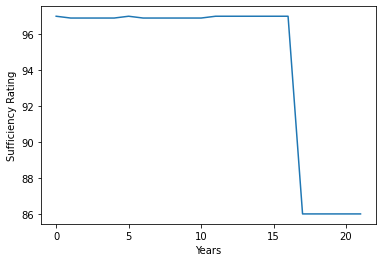

In [15]:
import matplotlib.pyplot as plt

plt.plot(sufficiency_rating_list)
plt.ylabel('Sufficiency Rating')
plt.xlabel('Years')
plt.show()


# Example of first training example

In [16]:
import pandas as pd

var1 = []
var2 = []
var3 = []
var4 = []
var5 = []
var6 = []
varout = []

for element in list_of_row_components:
#     print(element)
    var1.append(element[0])
    var2.append(element[2])
    var3.append(element[3])
    var4.append(element[4])
    var5.append(element[5])
    var6.append(element[6])
    varout.append(element[1])
    
dict_temp = {'var1': var1, 'var2': var2, 'var3': var3, 'var4': var4, 'var5': var5, 'var6': var6, 'varout': varout}

df_temp = pd.DataFrame(dict_temp)

In [17]:
df_temp

,var1,var2,var3,var4,var5,var6,varout
0,36.0,428.0,1949.0,2.0,10.9,7.3,97.0
1,36.0,955.0,1949.0,2.0,10.9,7.3,96.9
2,36.0,955.0,1949.0,2.0,10.9,7.3,96.9
3,36.0,955.0,1949.0,2.0,10.9,7.3,96.9
4,36.0,955.0,1949.0,2.0,10.9,7.3,96.9
5,36.3,955.0,1949.0,2.0,11.0,7.0,97.0
6,36.3,955.0,1949.0,2.0,11.0,7.3,96.9
7,36.3,983.0,1949.0,2.0,11.0,7.3,96.9
8,36.3,983.0,1949.0,2.0,11.0,7.3,96.9
9,36.3,983.0,1949.0,2.0,11.0,7.3,96.9


# Convert each rows into it's own dataframe representing an individual time series example

In [18]:
import re
import pandas as pd

non_decimal = re.compile(r'[^\d.]+')

list_of_training_df = []

for i in range(1, 524):
    
    list_of_row_components = []
    
    current_row = df.iloc[i]
    current_row = current_row.iloc[1:]
    
    for j, row in current_row.iteritems():
        
        current_row_components = row.split(', ')
        current_row_components_replaced = []

        for idx, component in enumerate(current_row_components):

            result = non_decimal.sub('', current_row_components[idx])
            current_row_components_replaced.append(float(result))

        list_of_row_components.append(current_row_components_replaced)

    var1 = []
    var2 = []
    var3 = []
    var4 = []
    var5 = []
    var6 = []
    varout = []

    for element in list_of_row_components:

        var1.append(element[0])
        var2.append(element[2])
        var3.append(element[3])
        var4.append(element[4])
        var5.append(element[5])
        var6.append(element[6])
        varout.append(element[1])

    dict_temp = {'var1': var1, 'var2': var2, 'var3': var3, 'var4': var4, 'var5': var5, 'var6': var6, 'varout': varout}

    df_temp = pd.DataFrame(dict_temp)

    list_of_training_df.append(df_temp)

In [19]:
len(list_of_training_df)

523

In [20]:
list_of_training_df[7]

,var1,var2,var3,var4,var5,var6,varout
0,36.0,660.0,1970.0,2.0,11.2,2.4,96.9
1,36.0,950.0,1970.0,2.0,11.1,2.4,96.9
2,36.0,950.0,1970.0,2.0,11.1,2.4,96.9
3,36.0,950.0,1970.0,2.0,11.1,2.4,96.9
4,36.0,950.0,1970.0,2.0,11.1,2.4,96.9
5,36.3,950.0,1970.0,2.0,11.1,2.0,97.0
6,36.3,950.0,1970.0,2.0,11.1,2.4,96.9
7,36.3,700.0,1970.0,2.0,11.1,2.0,96.9
8,36.3,700.0,1970.0,2.0,11.1,2.0,96.9
9,36.3,700.0,1970.0,2.0,11.1,2.6,85.9


In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

list_of_scaled_training_df = []
encoder = LabelEncoder()

scaler = MinMaxScaler(feature_range=(0, 1))

for training_df in list_of_training_df:
    temp_df = scaler.fit_transform(training_df)
    list_of_scaled_training_df.append(temp_df)

In [22]:
list_of_scaled_training_df[500]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.00194932, 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.00194932, 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.00194932, 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.00194932, 0.        ],
       [0.        , 1.        , 0.        , 0.        , 1.        ,
        0.00194932, 0.        ],
       [0.        , 1.        , 0.        , 0.        , 1.        ,
        0.00194932, 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0. 

# Single example of a time series example for a single bridge

In [23]:
values = list_of_training_df[7].values

In [24]:
n_train_hours = 21
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(21, 1, 6) (21,) (1, 1, 6) (1,)


# Confirm gpu is being used before training

In [25]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

In [26]:
get_available_gpus()

['/device:GPU:0']

# Build LSTM model

In [27]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(50, return_sequences=True),
    tf.keras.layers.LSTM(30, return_sequences=True),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

# Compile model

In [28]:
lstm_model.compile(loss='mae', optimizer='adam')

# Because we have individual time series for each bridge, we define an epoch number and for each epoch we train the model an a random bridge time series

# At the end, we plot the loss and validation loss over time

EPOCH: 1 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 96.9895 - val_loss: 96.3657
EPOCH: 2 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 98.0752 - val_loss: 98.9391
EPOCH: 3 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 81.9765 - val_loss: 81.9591
EPOCH: 4 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 42.7650 - val_loss: 33.9068
EPOCH: 5 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 60.0389 - val_loss: 57.1923
EPOCH: 6 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 99.4029 - val_loss: 99.3865
EPOCH: 7 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 63.8224 - val_loss: 63.8089
EPOCH: 8 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 81.8566 - val_loss: 81.8380
EPOCH: 9 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 24.8260 - val_loss: 6.7056
EPOCH: 10 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 98.0713 - val_loss: 97.8644
EPOCH: 11 OUT OF 100

EPOCH: 84 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 37.6230 - val_loss: 34.9560
EPOCH: 85 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 46.9103 - val_loss: 46.0090
EPOCH: 86 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 14.6692 - val_loss: 16.9453
EPOCH: 87 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4.9590 - val_loss: 0.9568
EPOCH: 88 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 13.4985 - val_loss: 16.8481
EPOCH: 89 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 29.1896 - val_loss: 27.6506
EPOCH: 90 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 25.7178 - val_loss: 22.6679
EPOCH: 91 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 34.6733 - val_loss: 23.7712
EPOCH: 92 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 12.1804 - val_loss: 17.4188
EPOCH: 93 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 10.0003 - val_loss: 8.0627
EPOCH: 94 OUT

EPOCH: 167 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 11.5548 - val_loss: 17.0322
EPOCH: 168 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 17.9088 - val_loss: 19.4831
EPOCH: 169 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7.4741 - val_loss: 7.1157
EPOCH: 170 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 12.2241 - val_loss: 11.3766
EPOCH: 171 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1.8577 - val_loss: 1.6012
EPOCH: 172 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 48.7715 - val_loss: 49.4582
EPOCH: 173 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 27.6257 - val_loss: 34.4866
EPOCH: 174 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 16.5977 - val_loss: 17.2961
EPOCH: 175 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3.2039 - val_loss: 3.2754
EPOCH: 176 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7.5817 - val_loss: 6.9431
EPOCH: 1

EPOCH: 250 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5.8460 - val_loss: 5.3075
EPOCH: 251 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 14.4131 - val_loss: 22.4285
EPOCH: 252 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6.1952 - val_loss: 4.7333
EPOCH: 253 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5.9794 - val_loss: 4.0832
EPOCH: 254 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 11.7392 - val_loss: 8.5095
EPOCH: 255 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 11.6458 - val_loss: 16.8077
EPOCH: 256 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 9.0260 - val_loss: 11.5179
EPOCH: 257 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4.1130 - val_loss: 4.7613
EPOCH: 258 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 20.6577 - val_loss: 18.6881
EPOCH: 259 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2399 - val_loss: 0.7168
EPOCH: 260 O

EPOCH: 333 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5.9235 - val_loss: 5.3362
EPOCH: 334 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 9.4571 - val_loss: 41.0984
EPOCH: 335 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7.1559 - val_loss: 9.4698
EPOCH: 336 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1.8963 - val_loss: 1.8261
EPOCH: 337 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 38.5395 - val_loss: 38.0795
EPOCH: 338 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 18.4688 - val_loss: 18.5475
EPOCH: 339 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7.8590 - val_loss: 8.6506
EPOCH: 340 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 16.8844 - val_loss: 17.8388
EPOCH: 341 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 22.8028 - val_loss: 27.9289
EPOCH: 342 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 38.1785 - val_loss: 45.9283
EPOCH: 34

EPOCH: 416 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 17.7796 - val_loss: 17.5059
EPOCH: 417 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 12.6413 - val_loss: 14.8903
EPOCH: 418 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 10.1603 - val_loss: 9.8985
EPOCH: 419 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 10.8167 - val_loss: 13.1109
EPOCH: 420 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 43.5177 - val_loss: 69.1152
EPOCH: 421 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 45.9934 - val_loss: 45.9792
EPOCH: 422 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8.4107 - val_loss: 3.6584
EPOCH: 423 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 21.0511 - val_loss: 21.8055
EPOCH: 424 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 20.8645 - val_loss: 34.4554
EPOCH: 425 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 37.4830 - val_loss: 48.7582
EPO

EPOCH: 499 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 12.6271 - val_loss: 8.2460
EPOCH: 500 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 9.5902 - val_loss: 9.7016
EPOCH: 501 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 11.3724 - val_loss: 15.6437
EPOCH: 502 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6.7087 - val_loss: 4.1842
EPOCH: 503 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 17.7017 - val_loss: 27.0529
EPOCH: 504 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 9.1221 - val_loss: 12.5906
EPOCH: 505 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 53.4280 - val_loss: 51.0147
EPOCH: 506 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 16.8539 - val_loss: 17.1074
EPOCH: 507 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 46.3555 - val_loss: 46.1404
EPOCH: 508 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 21.6404 - val_loss: 23.7739
EPOCH:

EPOCH: 582 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3.6120 - val_loss: 4.5159
EPOCH: 583 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 16.8077 - val_loss: 12.7672
EPOCH: 584 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 12.0052 - val_loss: 8.4020
EPOCH: 585 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 18.0559 - val_loss: 17.6584
EPOCH: 586 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 12.5898 - val_loss: 10.6348
EPOCH: 587 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6.3305 - val_loss: 6.1330
EPOCH: 588 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 11.7378 - val_loss: 1.5626
EPOCH: 589 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 16.5768 - val_loss: 16.1971
EPOCH: 590 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7.5721 - val_loss: 1.9247
EPOCH: 591 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1.8965 - val_loss: 2.8791
EPOCH: 592

EPOCH: 665 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 26.0014 - val_loss: 36.0025
EPOCH: 666 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 10.3541 - val_loss: 8.6447
EPOCH: 667 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 25.0630 - val_loss: 39.7586
EPOCH: 668 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 36.9742 - val_loss: 32.8349
EPOCH: 669 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 9.8724 - val_loss: 13.4489
EPOCH: 670 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5.8846 - val_loss: 25.3906
EPOCH: 671 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 35.8271 - val_loss: 47.3814
EPOCH: 672 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 11.6424 - val_loss: 14.7693
EPOCH: 673 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6.0065 - val_loss: 4.1723
EPOCH: 674 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 14.4804 - val_loss: 12.9564
EPOCH

EPOCH: 748 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 28.8275 - val_loss: 45.2880
EPOCH: 749 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8.3947 - val_loss: 8.8050
EPOCH: 750 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 10.2366 - val_loss: 9.8624
EPOCH: 751 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 9.5072 - val_loss: 10.1377
EPOCH: 752 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 18.9877 - val_loss: 17.8497
EPOCH: 753 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 33.4691 - val_loss: 31.9512
EPOCH: 754 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8.5729 - val_loss: 8.8086
EPOCH: 755 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 23.3015 - val_loss: 22.7199
EPOCH: 756 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4.7555 - val_loss: 1.8988
EPOCH: 757 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 13.0631 - val_loss: 13.6087
EPOCH: 7

1/1 - 0s - loss: 8.9844 - val_loss: 9.1060
EPOCH: 831 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 12.8509 - val_loss: 12.3124
EPOCH: 832 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4.7987 - val_loss: 3.8329
EPOCH: 833 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 12.8431 - val_loss: 16.1164
EPOCH: 834 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 17.3830 - val_loss: 16.4582
EPOCH: 835 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7.1996 - val_loss: 4.0102
EPOCH: 836 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 17.3006 - val_loss: 23.4828
EPOCH: 837 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 43.2051 - val_loss: 43.4841
EPOCH: 838 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 9.3339 - val_loss: 5.8690
EPOCH: 839 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3.4495 - val_loss: 10.6717
EPOCH: 840 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s 

EPOCH: 914 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.7683 - val_loss: 0.7174
EPOCH: 915 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 9.1358 - val_loss: 10.5117
EPOCH: 916 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2.1798 - val_loss: 3.4988
EPOCH: 917 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3.4733 - val_loss: 0.2095
EPOCH: 918 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3043 - val_loss: 0.5880
EPOCH: 919 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 9.1404 - val_loss: 9.1330
EPOCH: 920 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3.8711 - val_loss: 3.6803
EPOCH: 921 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6.8461 - val_loss: 22.6839
EPOCH: 922 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 44.0453 - val_loss: 43.9291
EPOCH: 923 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 12.6765 - val_loss: 14.5108
EPOCH: 924 OUT

EPOCH: 997 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 35.3626 - val_loss: 43.8456
EPOCH: 998 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 18.1758 - val_loss: 17.2510
EPOCH: 999 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 10.9693 - val_loss: 10.2736
EPOCH: 1000 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 23.4782 - val_loss: 25.7237


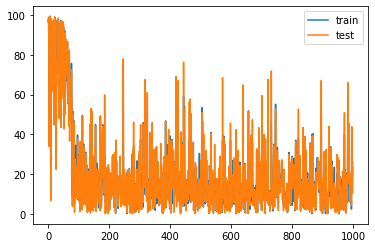

In [29]:
from matplotlib import pyplot
import random

EPOCHS = 1000

losses = []
val_losses = []

for a in range(EPOCHS):
    
    print('EPOCH: ' + str(a+1) +  ' OUT OF ' + str(EPOCHS))

    rand_int = random.randint(0, 522)

    values = list_of_training_df[rand_int].values

    n_train_hours = 21
    train = values[:n_train_hours, :]
    test = values[n_train_hours:, :]

    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]

    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

    # fit network
    history = lstm_model.fit(train_X, train_y, epochs=1, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

    for idx, h in enumerate(history.history['loss']):
        losses.append(h)
        val_losses.append(history.history['val_loss'])
        
# plot history
pyplot.plot(losses, label='train')
pyplot.plot(val_losses, label='test')
pyplot.legend()
pyplot.show()

# Based on the num_predictions we choose, we predict on that many random time series and derive a resulting root mean square error

In [30]:
from numpy import concatenate
from sklearn.metrics import mean_squared_error
import math

num_predictions = 200

summation = 0

actual = []
predicted = []

for a in range(num_predictions):
    
    rand_int = random.randint(0, 522)

    values = list_of_training_df[rand_int].values

    n_train_hours = 21
    train = values[:n_train_hours, :]
    test = values[n_train_hours:, :]

    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]

    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
#     print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

    yhat = lstm_model.predict(test_X)
    
    actual.append(test_y[0])
    predicted.append(yhat[0][0][0])
    
#     print(yhat[0][0][0])
#     print(test_y[0])
    
#     difference = test_y[0] - yhat[0][0][0]
#     squared_difference = difference**2
#     summation = summation + squared_difference
    
mse = mean_squared_error(actual, predicted)
rmse = math.sqrt(mse)

In [31]:
rmse

18.58019339726416